## ЛУ 6: Сложни визуализации в matplotlib

В предишното упражнение научихме основите на библиотеката matplotlib. В това ще покажем няколко посоки, в които можем да разширим уменията си.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
healthexp = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/healthexp.csv')

### Форматиране

Matplotlib позволява пълен контрол върху всеки елемент на визуализацията, вкл. шрифтове, цветове, размери и т.н.

Към всяка визуализация можем да добавим разнообразни елементи, като заглавие (title) или етикет за ос (xlabel/ ylabel). Това става чрез съответния метод и низ с желаната стойност като обект:

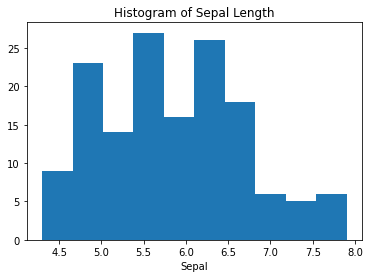

In [2]:
plt.hist(iris.sepal_length)
plt.title('Histogram of Sepal Length')
_ = plt.xlabel('Sepal') 
# На последния ред правим задаване на празна променлива, 
# за да избегнем автоматичното принтиране от jupyter.

Създавайки самата визуализация, можем да зададем множество други параметри, като цвят и отстояние на стълбовете. Можете да видите пълния диапазон възможни параметри чрез plt.hist? или в [документацията на метода](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

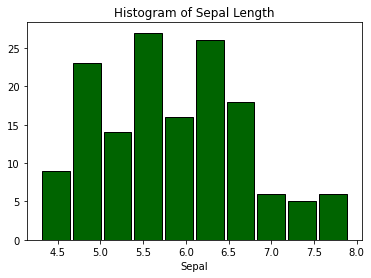

In [3]:
plt.hist(
    iris.sepal_length,
    color = 'darkgreen',
    rwidth = .9,
    edgecolor = 'black'
)
plt.title('Histogram of Sepal Length')
_ = plt.xlabel('Sepal')

Можем и да получим повече контрол върху текстовете си, създавайки речници с информация за тях (най-сигурен контрол се получава чрез употребата на модуле [font_manager](https://matplotlib.org/stable/api/font_manager_api.html)).

In [4]:
font1 = {
    'family': 'Times New Roman',
    'size': 20
}
font2 = {
    'family': 'serif',
    'size': 10
}
font3 = {
    'family': 'Times New Roman',
    'size': 14
}

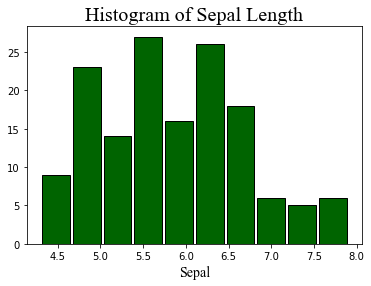

In [5]:
plt.hist(
    iris.sepal_length,
    color = 'darkgreen',
    rwidth = .9,
    edgecolor = 'black'
)


plt.title('Histogram of Sepal Length', fontdict=font1)
_ = plt.xlabel('Sepal', fontdict=font3)

Също така, можем да начертаем няколко хистограми една върху друга. Тук е особено полезен аргументът alpha, който задава нивото на прозрачност на цвета. Освен него сме променили броя на ивиците (bars), диапазона на стойности, който разглеждаме (range) и цвета (color). Аргументът data ни позволява да изберем от кой набор да бъде взета променливата ни (вместо да пишем това изрично в основния аргумент).

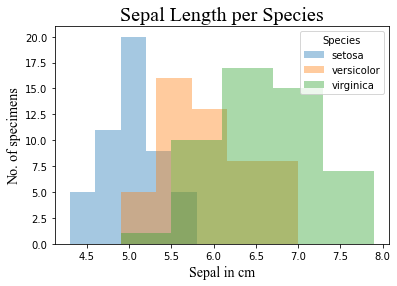

In [6]:
plt.hist(
    iris[iris.species=='setosa'].sepal_length, 
    alpha=.4, 
    bins=5, 
    label='setosa'
)

plt.hist(
    iris[iris.species=='versicolor'].sepal_length, 
    alpha=.4, 
    bins=5, 
    label='versicolor'
)

plt.hist(
    iris[iris.species=='virginica'].sepal_length,
    alpha=.4, 
    bins=5, 
    label='virginica'
)

plt.legend(title='Species')

plt.title('Sepal Length per Species', fontdict=font1)
plt.xlabel('Sepal in cm', fontdict=font3)
_ = plt.ylabel('No. of specimens', fontdict=font3)


За жалост, декларативният подход с методи на plt стига само донякъде: например, не можем да променим вида на фона на легендата или на числата (ticks) по осите. Ако създаваме сложни визуализации, препоръчително е да използваме отделни обекти за всеки елемент.

Всяка фигура в matplotlib може да бъде създадена и като независим обект (променлива), който съществува извън собствената си клетка код. В такъв случай използваме функцията plt.subplots(), от която получаваме два елемента (фигура и ос), като оста съдържа самата визуализация.

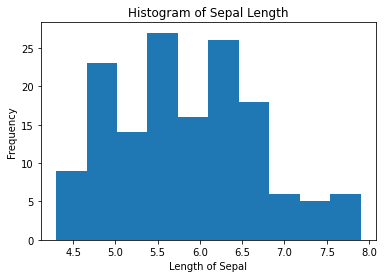

In [7]:
fig, ax = plt.subplots()
ax.hist(iris.sepal_length)

_ = ax.set(
    xlabel='Length of Sepal', 
    ylabel='Frequency', 
    title='Histogram of Sepal Length'
)


### Още примери за сложни визуализации

В документацията на matplotlib можем да открием [примери](https://matplotlib.org/stable/gallery/index.html) за разнообразни сложни визуализации, като [струпани стълбове с етикети](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py), [точкова диаграма с информация в размера и формата на точките](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_masked.html#sphx-glr-gallery-lines-bars-and-markers-scatter-masked-py) или дори [времева линия със събития](https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html#sphx-glr-gallery-lines-bars-and-markers-timeline-py).

### Други библиотеки за визуализация

Можем да добавим определен цвят според трета променлива (аргументът c), както и да променим размера според четвърта (чрез аргумента s), което ни позволява да визуализираме данните си в няколко измерения. По този начин виждаме, че по-малките близалца и листа принадлежат на подвида setosa, докато versicolor и virginica притежават по-дълги близалца и листа.

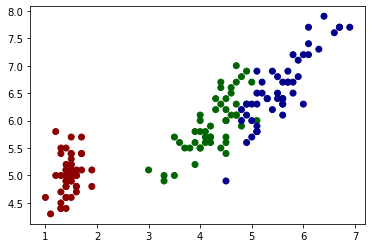

In [8]:
colouring={
    'setosa':'DarkRed', 
    'versicolor': 'DarkGreen', 
    'virginica': 'DarkBlue'
}

coloured_scatterplot = plt.scatter(
    'petal_length',
    'sepal_length', 
    c=iris.species.map(colouring), 
    data=iris
)


Matplotlib предоставя много функционалност, но затова пък няма твърде много удобство. Библиотеки като seaborn надграждат над това, която mtplotlib вече има, за да предоставят готови често използвани сложни визуализации, като pairplots:

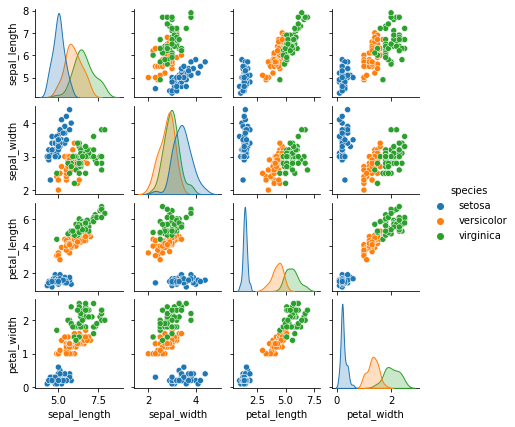

In [9]:
import seaborn as sns
seaborn_pairplot = sns.pairplot(iris, hue='species', height=1.5)

Друга библиотека за визуализиране е Altair, която използва по-различен (декларативен) синтаксис. Също така, тя извършва доста пвоече автоматични операции и може да създава интерактивни обекти, както и комбинации от интерактивни визуализации, които се филтрират една-друга.

In [10]:
import altair as alt

alt.Chart(iris).mark_point().encode(
    x='petal_length', 
    y='sepal_length', 
    color='species'
).interactive()

alt.Chart(...)

### Задача

Добавете заглавия и етикети на осите към визуализациите от миналия път. Опишете и визуализирайте отношението на всяка от двете променливи с:
 - друга количествена променлива;
 - друга качествена променлива.